## Package importing

In [4]:
from fastai.vision.all import *
from pathlib import Path

In [10]:
path = Path.cwd()/'../datasets/bears'
path

Path('/home/fastai-2020-lalkrishna/My-files/Projects/../datasets/bears')

## Data Loading

In [17]:
bears = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        splitter = RandomSplitter(valid_pct=0.3),
        get_items = get_image_files,
        get_y = parent_label,
        item_tfms = Resize(128),
        batch_tfms= aug_transforms(mult=2))

In [18]:
data = bears.dataloaders(path)

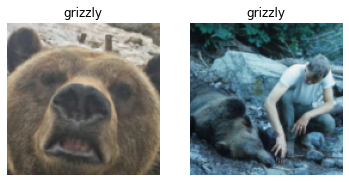

In [19]:
data.valid.show_batch(max_n = 2)

#### Image Augmentation

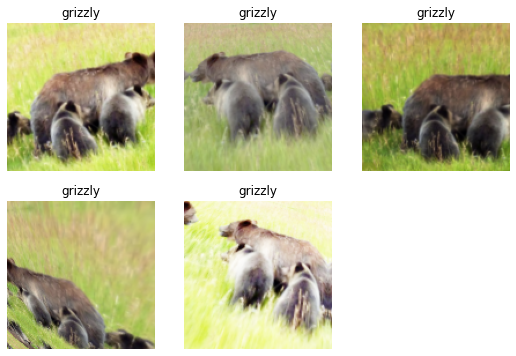

In [24]:
data.train.show_batch(max_n = 5, unique=True)

### training

In [30]:
model = cnn_learner(data, resnet34, metrics=error_rate)
model.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.529422,0.211260,0.083333,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.452584,0.162403,0.044872,00:02
1,0.335864,0.159358,0.044872,00:02
2,0.280420,0.146719,0.025641,00:02
3,0.276803,0.139426,0.025641,00:02


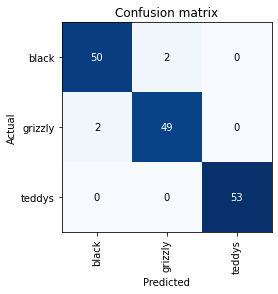

In [31]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

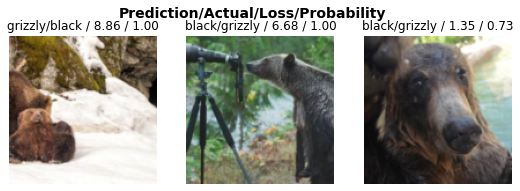

In [32]:
interp.plot_top_losses(3)

### exporting model

In [33]:
model.export(fname = 'bear.pkl')

In [34]:
model_loaded = load_learner('bear.pkl')

In [41]:
from fastai.vision.widgets import FileUpload

upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

In [44]:
upload.data[0]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x0b\x08\x08\x08\x08\x08\x0b\x08\x08\x0b\x10\x0b\t\x0b\x10\x13\x0e\x0b\x0b\x0e\x13\x16\x12\x12\x13\x12\x12\x16\x15\x11\x13\x12\x12\x13\x11\x15\x15\x19\x1a\x1b\x1a\x19\x15!!$$!!0///06666666666\xff\xdb\x00C\x01\x0c\x0b\x0b\x0c\r\x0c\x0f\r\r\x0f\x13\x0e\x0e\x0e\x13\x14\x0e\x0f\x0f\x0e\x14\x1a\x12\x12\x14\x12\x12\x1a"\x18\x15\x15\x15\x15\x18"\x1e \x1b\x1b\x1b \x1e%%""%%//,//6666666666\xff\xc0\x00\x11\x08\x04Z\x04k\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\

In [42]:
model_loaded.predict(upload.data[0])

('teddys', tensor(2), tensor([2.4656e-10, 1.3758e-08, 1.0000e+00]))